# F1 Telemetry functions

## Import libraries

In [4]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd

## Exploration

In [4]:
# Load a specific race session
session = fastf1.get_session(2024, 'Brazil', 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (343.38 MB) /Users/mike/Library/Caches/fastf1


core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '31', '10', '63', '16'

In [13]:
session.car_data

{'1':                          Date   RPM  Speed  nGear  Throttle  Brake  DRS  \
 0     2024-11-03 14:38:04.491     0      0      0         0  False    0   
 1     2024-11-03 14:38:04.851     0      0      0         0  False    0   
 2     2024-11-03 14:38:05.091     0      0      0         0  False    0   
 3     2024-11-03 14:38:05.291     0      0      0         0  False    0   
 4     2024-11-03 14:38:05.571     0      0      0         0  False    0   
 ...                       ...   ...    ...    ...       ...    ...  ...   
 45055 2024-11-03 17:58:54.532  6512    132      5         0  False    1   
 45056 2024-11-03 17:58:54.692  6392    131      5         3  False    1   
 45057 2024-11-03 17:58:55.012  6475    130      5         5  False    1   
 45058 2024-11-03 17:58:55.452  6523    129      5        10  False    1   
 45059 2024-11-03 17:58:55.732  6513    129      5        10  False    1   
 
       Source                   Time            SessionTime  
 0        car 0 day

In [20]:
fastest_lap

Time                      0 days 03:16:06.670000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:20.472000
LapNumber                                   67.0
Stint                                        2.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:20.546000
Sector2Time               0 days 00:00:42.236000
Sector3Time               0 days 00:00:17.690000
Sector1SessionTime        0 days 03:15:06.729000
Sector2SessionTime        0 days 03:15:48.965000
Sector3SessionTime        0 days 03:16:06.655000
SpeedI1                                    305.0
SpeedI2                                    240.0
SpeedFL                                    307.0
SpeedST                                    274.0
IsPersonalBest                              True
Compound                            INTERMEDIATE
TyreLife            

In [14]:
fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

In [21]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.222000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.356000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.222000,2024-11-03 15:51:36.968,1,10.0,False,,False,True
2,0 days 01:16:27.596000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.356000,2024-11-03 15:53:04.102,1,10.0,False,,False,True
3,0 days 01:17:54.298000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.596000,2024-11-03 15:54:30.342,12,10.0,False,,False,True
4,0 days 01:19:19.692000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.298000,2024-11-03 15:55:57.044,1,9.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0 days 03:13:57.033000,PIA,81,0 days 00:01:21.840000,65.0,3.0,NaT,NaT,0 days 00:00:20.784000,0 days 00:00:43.137000,...,False,McLaren,0 days 03:12:35.193000,2024-11-03 17:50:37.939,1,7.0,False,,False,True
1131,0 days 03:15:18.917000,PIA,81,0 days 00:01:21.884000,66.0,3.0,NaT,NaT,0 days 00:00:20.864000,0 days 00:00:43.215000,...,False,McLaren,0 days 03:13:57.033000,2024-11-03 17:51:59.779,1,7.0,False,,False,True
1132,0 days 03:16:41.203000,PIA,81,0 days 00:01:22.286000,67.0,3.0,NaT,NaT,0 days 00:00:21.336000,0 days 00:00:43.159000,...,False,McLaren,0 days 03:15:18.917000,2024-11-03 17:53:21.663,1,7.0,False,,False,True
1133,0 days 03:18:02.922000,PIA,81,0 days 00:01:21.719000,68.0,3.0,NaT,NaT,0 days 00:00:20.873000,0 days 00:00:42.918000,...,False,McLaren,0 days 03:16:41.203000,2024-11-03 17:54:43.949,1,7.0,False,,False,True


In [16]:
car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-11-03 17:52:49.251,10908,309,8,100,False,1,car,0 days 00:00:00.307000,0 days 03:14:46.505000,26.350833
1,2024-11-03 17:52:49.491,10919,310,8,100,False,1,car,0 days 00:00:00.547000,0 days 03:14:46.745000,47.017500
2,2024-11-03 17:52:49.811,10915,310,8,100,False,1,car,0 days 00:00:00.867000,0 days 03:14:47.065000,74.573056
3,2024-11-03 17:52:50.011,10948,310,8,100,False,1,car,0 days 00:00:01.067000,0 days 03:14:47.265000,91.795278
4,2024-11-03 17:52:50.290,10959,311,8,100,False,1,car,0 days 00:00:01.346000,0 days 03:14:47.544000,115.897778
...,...,...,...,...,...,...,...,...,...,...,...
292,2024-11-03 17:54:08.051,10825,306,8,100,False,1,car,0 days 00:01:19.107000,0 days 03:16:05.305000,4134.623056
293,2024-11-03 17:54:08.211,10825,307,8,100,False,1,car,0 days 00:01:19.267000,0 days 03:16:05.465000,4148.267500
294,2024-11-03 17:54:08.531,10802,308,8,100,False,1,car,0 days 00:01:19.587000,0 days 03:16:05.785000,4175.645278
295,2024-11-03 17:54:08.771,10813,308,8,100,False,1,car,0 days 00:01:19.827000,0 days 03:16:06.025000,4196.178611


In [8]:
session.track_status.head()

,Time,Status,Message
0,0 days 00:00:00,1,AllClear
1,0 days 00:52:58.758000,2,Yellow
2,0 days 00:58:32.359000,1,AllClear
3,0 days 01:13:10.258000,2,Yellow
4,0 days 01:13:19.484000,1,AllClear


In [9]:
session.total_laps

71

In [10]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.222000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.356000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.222000,2024-11-03 15:51:36.968,1,10.0,False,,False,True
2,0 days 01:16:27.596000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.356000,2024-11-03 15:53:04.102,1,10.0,False,,False,True
3,0 days 01:17:54.298000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.596000,2024-11-03 15:54:30.342,12,10.0,False,,False,True
4,0 days 01:19:19.692000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.298000,2024-11-03 15:55:57.044,1,9.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0 days 03:13:57.033000,PIA,81,0 days 00:01:21.840000,65.0,3.0,NaT,NaT,0 days 00:00:20.784000,0 days 00:00:43.137000,...,False,McLaren,0 days 03:12:35.193000,2024-11-03 17:50:37.939,1,7.0,False,,False,True
1131,0 days 03:15:18.917000,PIA,81,0 days 00:01:21.884000,66.0,3.0,NaT,NaT,0 days 00:00:20.864000,0 days 00:00:43.215000,...,False,McLaren,0 days 03:13:57.033000,2024-11-03 17:51:59.779,1,7.0,False,,False,True
1132,0 days 03:16:41.203000,PIA,81,0 days 00:01:22.286000,67.0,3.0,NaT,NaT,0 days 00:00:21.336000,0 days 00:00:43.159000,...,False,McLaren,0 days 03:15:18.917000,2024-11-03 17:53:21.663,1,7.0,False,,False,True
1133,0 days 03:18:02.922000,PIA,81,0 days 00:01:21.719000,68.0,3.0,NaT,NaT,0 days 00:00:20.873000,0 days 00:00:42.918000,...,False,McLaren,0 days 03:16:41.203000,2024-11-03 17:54:43.949,1,7.0,False,,False,True


In [14]:
len(session.drivers) * session.total_laps # is larger since not all drivers did all laps

1420

In [24]:
laps = session.laps  # Get all laps completed in the session
driver_laps = session.laps.pick_drivers(['VER'])  # Get laps for a specific driver (e.g., 'VER' for Max Verstappen)

In [26]:
driver_laps.tail()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
64,0 days 03:13:25.087000,VER,1,0 days 00:01:20.990000,65.0,2.0,NaT,NaT,0 days 00:00:20.581000,0 days 00:00:42.614000,...,True,Red Bull Racing,0 days 03:12:04.097000,2024-11-03 17:50:06.843,1,1.0,False,,False,True
65,0 days 03:14:46.198000,VER,1,0 days 00:01:21.111000,66.0,2.0,NaT,NaT,0 days 00:00:20.787000,0 days 00:00:42.539000,...,True,Red Bull Racing,0 days 03:13:25.087000,2024-11-03 17:51:27.833,1,1.0,False,,False,True
66,0 days 03:16:06.670000,VER,1,0 days 00:01:20.472000,67.0,2.0,NaT,NaT,0 days 00:00:20.546000,0 days 00:00:42.236000,...,True,Red Bull Racing,0 days 03:14:46.198000,2024-11-03 17:52:48.944,1,1.0,False,,False,True
67,0 days 03:17:28.224000,VER,1,0 days 00:01:21.554000,68.0,2.0,NaT,NaT,0 days 00:00:20.852000,0 days 00:00:42.920000,...,True,Red Bull Racing,0 days 03:16:06.670000,2024-11-03 17:54:09.416,1,1.0,False,,False,True
68,0 days 03:18:49.546000,VER,1,0 days 00:01:21.322000,69.0,2.0,NaT,NaT,0 days 00:00:20.643000,0 days 00:00:42.806000,...,True,Red Bull Racing,0 days 03:17:28.224000,2024-11-03 17:55:30.970,1,1.0,False,,False,True


In [28]:
max(driver_laps['LapNumber']) # completed all laps

69.0

In [29]:
# Get telemetry data for a specific lap
lap = driver_laps.pick_fastest()  # Pick the fastest lap of the driver
telemetry = lap.get_telemetry()  # Get telemetry for that lap

# Access speed, throttle, brake, etc.
speed = telemetry['Speed']
throttle = telemetry['Throttle']
brake = telemetry['Brake']

In [31]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-11-03 17:52:48.944,0 days 03:14:46.198000,,NaN,0 days 00:00:00,10889,309,8,100,False,1,interpolation,-0.008468,-0.000002,OnTrack,-3670,-5280,7768
3,2024-11-03 17:52:49.078,0 days 03:14:46.332000,,NaN,0 days 00:00:00.134000,10895,309,8,100,False,1,pos,11.484824,0.002693,OnTrack,-3637,-5416,7773
4,2024-11-03 17:52:49.251,0 days 03:14:46.505000,,NaN,0 days 00:00:00.307000,10908,309,8,100,False,1,car,26.350833,0.006179,OnTrack,-3577,-5652,7781
5,2024-11-03 17:52:49.318,0 days 03:14:46.572000,,NaN,0 days 00:00:00.374000,10913,309,8,100,False,1,pos,32.116572,0.007531,OnTrack,-3557,-5732,7784
6,2024-11-03 17:52:49.491,0 days 03:14:46.745000,,NaN,0 days 00:00:00.547000,10919,310,8,100,False,1,car,47.017500,0.011024,OnTrack,-3525,-5856,7788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2024-11-03 17:54:08.771,0 days 03:16:06.025000,,NaN,0 days 00:01:19.827000,10813,308,8,100,False,1,car,4196.178611,0.983899,OnTrack,-3769,-4891,7757
613,2024-11-03 17:54:08.917,0 days 03:16:06.171000,,NaN,0 days 00:01:19.973000,10836,308,8,100,False,1,pos,4208.695908,0.986834,OnTrack,-3755,-4950,7760
614,2024-11-03 17:54:09.211,0 days 03:16:06.465000,,NaN,0 days 00:01:20.267000,10859,309,8,100,False,1,car,4233.945278,0.992755,OnTrack,-3714,-5111,7763
615,2024-11-03 17:54:09.338,0 days 03:16:06.592000,,NaN,0 days 00:01:20.394000,10849,309,8,100,False,1,pos,4244.848882,0.995311,OnTrack,-3692,-5200,7766


We do not know the brake pressure??

What about the steering angle?

In [37]:
weather_data = session.weather_data  # Access weather data for the session
weather_data.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:22.903000,22.2,86.0,927.4,True,27.3,0,0.4
1,0 days 00:01:22.903000,22.3,87.0,927.3,True,26.2,191,0.0
2,0 days 00:02:22.903000,22.1,86.0,927.4,True,26.4,182,0.8
3,0 days 00:03:22.906000,22.1,87.0,927.4,True,26.4,210,0.5
4,0 days 00:04:22.910000,22.1,87.0,927.3,True,26.2,0,0.4


In [38]:
drivers = session.drivers  # Get a dictionary of drivers participating in the session
drivers

['1',
 '31',
 '10',
 '63',
 '16',
 '4',
 '22',
 '81',
 '30',
 '44',
 '11',
 '50',
 '77',
 '14',
 '24',
 '55',
 '43',
 '23',
 '18',
 '27']

## Import libraries

In [1]:
import fastf1
import matplotlib.pyplot as plt
from telemetry_utils import *

## Telemetry comparison between drivers for specific lap

In [2]:
# Load a specific race session
session = fastf1.get_session(2024, 'Brazil', 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (343.38 MB) /Users/mike/Library/Caches/fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messag

In [9]:
driver1 = session.laps.pick_drivers('HAM').pick_fastest()  # Pick fastest lap of driver 1
driver2 = session.laps.pick_drivers('LEC').pick_fastest()  # Pick fastest lap of driver 2

# Get telemetry for both drivers
telemetry_driver1 = driver1.get_telemetry()
telemetry_driver2 = driver2.get_telemetry()

# Plot a comparison (e.g., Speed)
# plt.plot(telemetry_driver1['Distance'], telemetry_driver1['Speed'], label='HAM')
# plt.plot(telemetry_driver2['Distance'], telemetry_driver2['Speed'], label='LEC')
# plt.xlabel('Distance (m)')
# plt.ylabel('Speed (km/h)')
# plt.title('Speed Comparison Between HAM and LEC')
# plt.legend()
# plt.show()


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [60]:
telemetry_driver1.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

**Available attributes**

['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z']

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


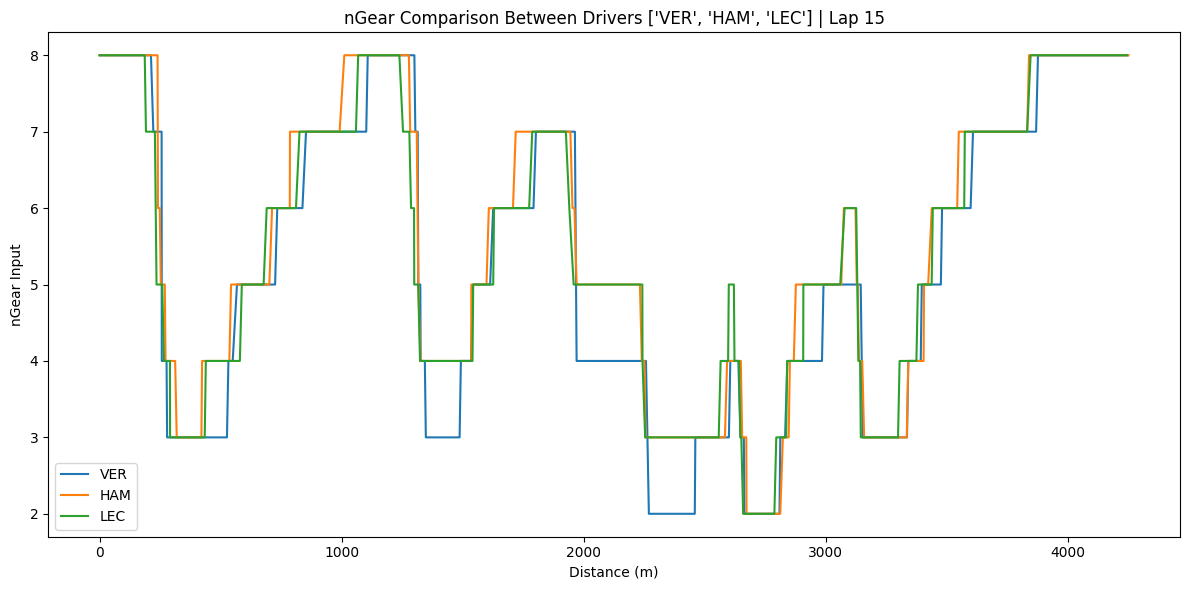

In [ ]:
telemetry_attr_comparison(session=session, drivers_abbrs=['VER', 'HAM', 'LEC'], attr='nGear', lap=15)

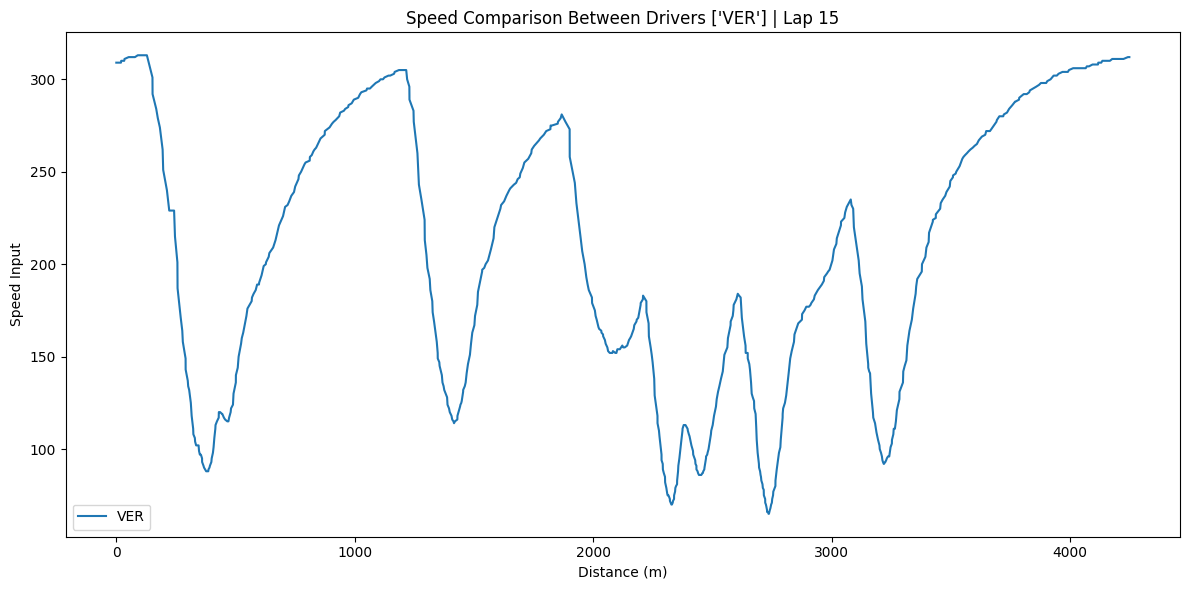

In [10]:
telemetry_attr_comparison(session=session, drivers_abbrs=['VER'], attr='Speed', lap=15)

## Lap times

In [55]:
import fastf1.plotting
import seaborn as sns
import pandas as pd

In [56]:
driver_laps = session.laps.pick_drivers("ALO").pick_quicklaps().reset_index()

In [60]:
sub_driver_laps = driver_laps.loc[:, ['LapNumber', 'LapTime']]
# sub_driver_laps['LapTime'] = sub_driver_laps['LapTime'] - pd.to_timedelta(sub_driver_laps['LapTime'].dt.days, unit='d')

In [65]:
driver_laps['Stint']

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    3.0
25    3.0
26    3.0
27    3.0
28    3.0
29    3.0
30    3.0
31    3.0
32    3.0
33    3.0
34    3.0
35    3.0
36    3.0
37    3.0
38    3.0
39    3.0
40    3.0
41    3.0
42    3.0
43    3.0
44    3.0
45    3.0
46    3.0
47    3.0
48    3.0
49    3.0
50    3.0
Name: Stint, dtype: float64

In [61]:
sub_driver_laps['LapTime']

0    0 days 00:01:27.116000
1    0 days 00:01:26.966000
2    0 days 00:01:26.720000
3    0 days 00:01:26.044000
4    0 days 00:01:26.445000
5    0 days 00:01:25.264000
6    0 days 00:01:24.707000
7    0 days 00:01:24.702000
8    0 days 00:01:25.472000
9    0 days 00:01:24.692000
10   0 days 00:01:24.657000
11   0 days 00:01:24.886000
12   0 days 00:01:24.793000
13   0 days 00:01:24.579000
14   0 days 00:01:24.510000
15   0 days 00:01:24.035000
16   0 days 00:01:24.787000
17   0 days 00:01:23.949000
18   0 days 00:01:24.090000
19   0 days 00:01:24.384000
20   0 days 00:01:24.204000
21   0 days 00:01:24.270000
22   0 days 00:01:24.443000
23   0 days 00:01:26.960000
24   0 days 00:01:26.561000
25   0 days 00:01:25.846000
26   0 days 00:01:23.861000
27   0 days 00:01:25.094000
28   0 days 00:01:23.697000
29   0 days 00:01:23.379000
30   0 days 00:01:23.573000
31   0 days 00:01:23.712000
32   0 days 00:01:23.484000
33   0 days 00:01:23.078000
34   0 days 00:01:23.265000
35   0 days 00:01:22

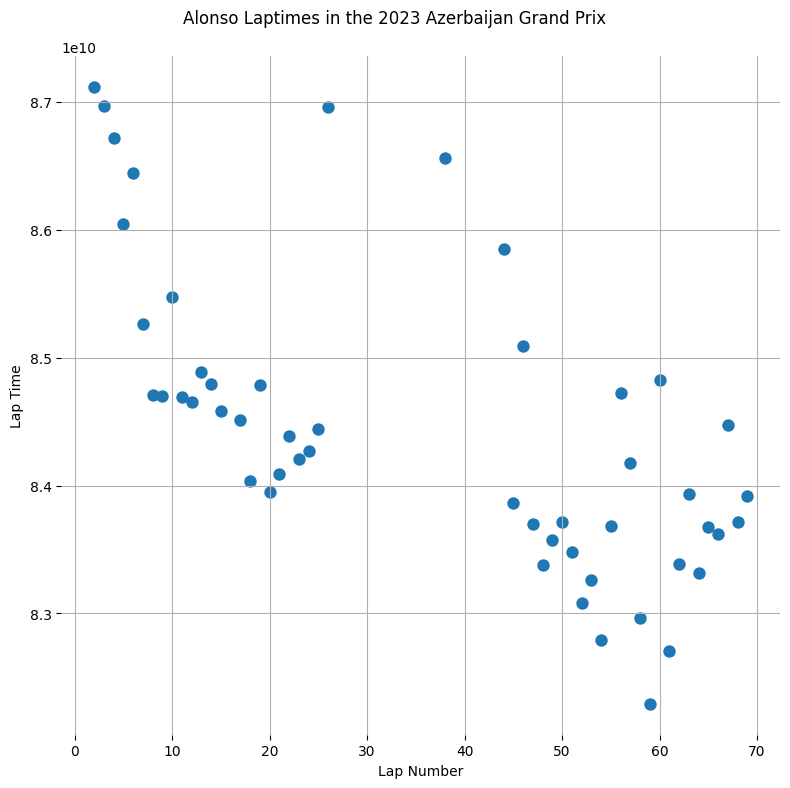

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=sub_driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                s=80,
                linewidth=0,
                legend='auto')


ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [18]:
session = fastf1.get_session(2024, 'Sao Paulo Grand Prix', 'R')
session.load()
session.laps

events      WARNING 	Correcting user input 'Sao Paulo Grand Prix' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_mess

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.222000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.356000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.222000,2024-11-03 15:51:36.968,1,10.0,False,,False,True
2,0 days 01:16:27.596000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.356000,2024-11-03 15:53:04.102,1,10.0,False,,False,True
3,0 days 01:17:54.298000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.596000,2024-11-03 15:54:30.342,12,10.0,False,,False,True
4,0 days 01:19:19.692000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.298000,2024-11-03 15:55:57.044,1,9.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0 days 03:13:57.033000,PIA,81,0 days 00:01:21.840000,65.0,3.0,NaT,NaT,0 days 00:00:20.784000,0 days 00:00:43.137000,...,False,McLaren,0 days 03:12:35.193000,2024-11-03 17:50:37.939,1,7.0,False,,False,True
1131,0 days 03:15:18.917000,PIA,81,0 days 00:01:21.884000,66.0,3.0,NaT,NaT,0 days 00:00:20.864000,0 days 00:00:43.215000,...,False,McLaren,0 days 03:13:57.033000,2024-11-03 17:51:59.779,1,7.0,False,,False,True
1132,0 days 03:16:41.203000,PIA,81,0 days 00:01:22.286000,67.0,3.0,NaT,NaT,0 days 00:00:21.336000,0 days 00:00:43.159000,...,False,McLaren,0 days 03:15:18.917000,2024-11-03 17:53:21.663,1,7.0,False,,False,True
1133,0 days 03:18:02.922000,PIA,81,0 days 00:01:21.719000,68.0,3.0,NaT,NaT,0 days 00:00:20.873000,0 days 00:00:42.918000,...,False,McLaren,0 days 03:16:41.203000,2024-11-03 17:54:43.949,1,7.0,False,,False,True


In [19]:
laps_df = session.laps

In [20]:
laps_df

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.222000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.356000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.222000,2024-11-03 15:51:36.968,1,10.0,False,,False,True
2,0 days 01:16:27.596000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.356000,2024-11-03 15:53:04.102,1,10.0,False,,False,True
3,0 days 01:17:54.298000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.596000,2024-11-03 15:54:30.342,12,10.0,False,,False,True
4,0 days 01:19:19.692000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.298000,2024-11-03 15:55:57.044,1,9.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0 days 03:13:57.033000,PIA,81,0 days 00:01:21.840000,65.0,3.0,NaT,NaT,0 days 00:00:20.784000,0 days 00:00:43.137000,...,False,McLaren,0 days 03:12:35.193000,2024-11-03 17:50:37.939,1,7.0,False,,False,True
1131,0 days 03:15:18.917000,PIA,81,0 days 00:01:21.884000,66.0,3.0,NaT,NaT,0 days 00:00:20.864000,0 days 00:00:43.215000,...,False,McLaren,0 days 03:13:57.033000,2024-11-03 17:51:59.779,1,7.0,False,,False,True
1132,0 days 03:16:41.203000,PIA,81,0 days 00:01:22.286000,67.0,3.0,NaT,NaT,0 days 00:00:21.336000,0 days 00:00:43.159000,...,False,McLaren,0 days 03:15:18.917000,2024-11-03 17:53:21.663,1,7.0,False,,False,True
1133,0 days 03:18:02.922000,PIA,81,0 days 00:01:21.719000,68.0,3.0,NaT,NaT,0 days 00:00:20.873000,0 days 00:00:42.918000,...,False,McLaren,0 days 03:16:41.203000,2024-11-03 17:54:43.949,1,7.0,False,,False,True


In [21]:
laps_df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [25]:
laps_df.loc[:, ['Driver', 'LapTime', 'LapNumber', 'Stint', 'Compound']]

,Driver,LapTime,LapNumber,Stint,Compound
0,VER,0 days 00:01:39.161000,1.0,1.0,INTERMEDIATE
1,VER,0 days 00:01:27.134000,2.0,1.0,INTERMEDIATE
2,VER,0 days 00:01:26.240000,3.0,1.0,INTERMEDIATE
3,VER,0 days 00:01:26.702000,4.0,1.0,INTERMEDIATE
4,VER,0 days 00:01:25.394000,5.0,1.0,INTERMEDIATE
...,...,...,...,...,...
1130,PIA,0 days 00:01:21.840000,65.0,3.0,INTERMEDIATE
1131,PIA,0 days 00:01:21.884000,66.0,3.0,INTERMEDIATE
1132,PIA,0 days 00:01:22.286000,67.0,3.0,INTERMEDIATE
1133,PIA,0 days 00:01:21.719000,68.0,3.0,INTERMEDIATE


## Weather

In [27]:
weather_data = session.laps.get_weather_data()

In [ ]:
weather_data

Index(['Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed'],
      dtype='object')

## Results

In [42]:
results = session.results
results.head()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,1,17.0,NaT,NaT,NaT,0 days 02:06:54.430000,Finished,26.0
31,31,E OCON,OCO,ocon,Alpine,0093cc,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,2.0,2,4.0,NaT,NaT,NaT,0 days 00:00:19.477000,Finished,18.0
10,10,P GASLY,GAS,gasly,Alpine,0093cc,alpine,Pierre,Gasly,Pierre Gasly,...,FRA,3.0,3,13.0,NaT,NaT,NaT,0 days 00:00:22.532000,Finished,15.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,GBR,4.0,4,2.0,NaT,NaT,NaT,0 days 00:00:23.265000,Finished,12.0
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,5.0,5,6.0,NaT,NaT,NaT,0 days 00:00:30.177000,Finished,10.0


## Positions

In [92]:
pos_df = pd.read_csv("data/grand_prix_2024_season_laps.csv")

In [93]:
pos_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,EventName
0,0 days 00:58:41.686000,NOR,4,0 days 00:01:40.424000,1.0,1.0,NaN,NaN,NaN,0 days 00:00:41.379000,...,McLaren,0 days 00:57:01.006000,2024-09-22 12:03:57.137,1,1.0,False,NaN,False,False,Pre-Season Testing
1,0 days 01:00:20.166000,NOR,4,0 days 00:01:38.480000,2.0,1.0,NaN,NaN,0 days 00:00:29.268000,0 days 00:00:41.412000,...,McLaren,0 days 00:58:41.686000,2024-09-22 12:05:37.817,1,1.0,False,NaN,False,True,Pre-Season Testing
2,0 days 01:01:58.572000,NOR,4,0 days 00:01:38.406000,3.0,1.0,NaN,NaN,0 days 00:00:29.354000,0 days 00:00:41.262000,...,McLaren,0 days 01:00:20.166000,2024-09-22 12:07:16.297,1,1.0,False,NaN,False,True,Pre-Season Testing
3,0 days 01:03:37.018000,NOR,4,0 days 00:01:38.446000,4.0,1.0,NaN,NaN,0 days 00:00:29.399000,0 days 00:00:41.305000,...,McLaren,0 days 01:01:58.572000,2024-09-22 12:08:54.703,1,1.0,False,NaN,False,True,Pre-Season Testing
4,0 days 01:05:14.956000,NOR,4,0 days 00:01:37.938000,5.0,1.0,NaN,NaN,0 days 00:00:29.034000,0 days 00:00:41.159000,...,McLaren,0 days 01:03:37.018000,2024-09-22 12:10:33.149,1,1.0,False,NaN,False,True,Pre-Season Testing


In [94]:
pos_df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'EventName'],
      dtype='object')

In [95]:
pos_df = pos_df[['Driver', 'LapNumber', 'Stint', 'Position', 'EventName']]
pos_df = pos_df[pos_df['EventName'] != 'Pre-Season Testing']
pos_df.head()

,Driver,LapNumber,Stint,Position,EventName
1177,VER,1.0,1.0,1.0,Bahrain Grand Prix
1178,VER,2.0,1.0,1.0,Bahrain Grand Prix
1179,VER,3.0,1.0,1.0,Bahrain Grand Prix
1180,VER,4.0,1.0,1.0,Bahrain Grand Prix
1181,VER,5.0,1.0,1.0,Bahrain Grand Prix


In [96]:
pos_df['EventName'].unique()

array(['Bahrain Grand Prix', 'Saudi Arabian Grand Prix',
       'Australian Grand Prix', 'Japanese Grand Prix',
       'Chinese Grand Prix', 'Miami Grand Prix',
       'Emilia Romagna Grand Prix', 'Monaco Grand Prix',
       'Canadian Grand Prix', 'Spanish Grand Prix', 'Austrian Grand Prix',
       'British Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix',
       'Dutch Grand Prix', 'Italian Grand Prix', 'Azerbaijan Grand Prix',
       'Singapore Grand Prix', 'United States Grand Prix',
       'Mexico City Grand Prix', 'São Paulo Grand Prix'], dtype=object)

In [97]:
# # Here is the distinction if we want for one race otherwise for the whole season
# pos_df = pos_df[pos_df['EventName'] == 'Dutch Grand Prix']

In [116]:
over_df = pd.DataFrame()

events = pos_df['EventName'].unique()
drivers = pos_df['Driver'].unique()

over_df['Driver'] = drivers
over_df[events] = 0

In [117]:
over_df.head()

,Driver,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Japanese Grand Prix,Chinese Grand Prix,Miami Grand Prix,Emilia Romagna Grand Prix,Monaco Grand Prix,Canadian Grand Prix,...,British Grand Prix,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Azerbaijan Grand Prix,Singapore Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix
0,VER,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PER,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SAI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LEC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RUS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Iterate over the DataFrame grouped by each driver
for event in events:
    event_pos_df = pos_df[pos_df['EventName'] == event]

    for driver, group in event_pos_df.groupby('Driver'):
        # Sort by 'LapNumber' to ensure proper order
        group = group.sort_values(by='LapNumber')
        
        # Calculate when an overtake happens (position decrease)
        event_pos_df.loc[group.index, event] = (group['Position'].shift(1) > group['Position']).astype(int)

    # To find the total number of overtakes by each driver
    overtakes_per_driver = event_pos_df.groupby('Driver')[event].sum()

    # Add the new event column to over_df with values mapped from overtakes_per_driver
    over_df[event] = over_df['Driver'].map(overtakes_per_driver)

    # Replace any NaN values with 0 (if a driver doesn't appear in overtakes_per_driver)
    over_df[event] = over_df[event].fillna(0).astype(int)

/var/folders/9c/9pfxvdg55z52zckw2xcljktm0000gn/T/ipykernel_1235/3729388877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_pos_df.loc[group.index, event] = (group['Position'].shift(1) > group['Position']).astype(int)
/var/folders/9c/9pfxvdg55z52zckw2xcljktm0000gn/T/ipykernel_1235/3729388877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_pos_df.loc[group.index, event] = (group['Position'].shift(1) > group['Position']).astype(int)
/var/folders/9c/9pfxvdg55z52zckw2xcljktm0000gn/T/ipykern

In [145]:
sum(over_df[over_df['Driver'] == 'LEC'].loc[:, over_df.columns[1:]].T[3])

106

In [146]:
over_df

,Driver,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Japanese Grand Prix,Chinese Grand Prix,Miami Grand Prix,Emilia Romagna Grand Prix,Monaco Grand Prix,Canadian Grand Prix,...,British Grand Prix,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Azerbaijan Grand Prix,Singapore Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix
0,VER,0,1,0,2,2,1,3,1,3,...,5,7,9,3,7,5,1,2,8,9
1,PER,5,3,10,8,6,4,9,0,8,...,8,14,3,6,9,3,4,6,6,8
2,SAI,5,0,1,10,8,3,3,1,9,...,4,9,8,9,7,5,9,3,2,6
3,LEC,7,2,7,9,5,2,3,0,2,...,5,7,7,5,5,1,6,2,2,7
4,RUS,6,3,8,14,6,7,4,1,4,...,2,11,8,4,13,7,4,14,5,2
5,NOR,9,1,4,10,4,4,3,1,4,...,5,6,9,3,7,10,0,5,4,3
6,HAM,8,1,4,7,16,6,8,1,5,...,5,5,8,10,6,10,9,0,7,7
7,PIA,8,3,8,6,5,7,4,1,2,...,7,5,6,4,3,3,5,4,19,5
8,ALO,10,2,8,6,11,7,7,3,2,...,4,11,7,6,11,4,7,6,1,5
9,STR,14,0,7,11,10,5,11,3,4,...,4,12,12,4,13,5,8,10,6,0


In [147]:
over_df['TotalOvertakes'] = over_df[over_df.columns[1:]].sum(axis=1)

In [149]:
over_df.head()

,Driver,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Japanese Grand Prix,Chinese Grand Prix,Miami Grand Prix,Emilia Romagna Grand Prix,Monaco Grand Prix,Canadian Grand Prix,...,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Azerbaijan Grand Prix,Singapore Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix,TotalOvertakes
0,VER,0,1,0,2,2,1,3,1,3,...,7,9,3,7,5,1,2,8,9,75
1,PER,5,3,10,8,6,4,9,0,8,...,14,3,6,9,3,4,6,6,8,139
2,SAI,5,0,1,10,8,3,3,1,9,...,9,8,9,7,5,9,3,2,6,116
3,LEC,7,2,7,9,5,2,3,0,2,...,7,7,5,5,1,6,2,2,7,106
4,RUS,6,3,8,14,6,7,4,1,4,...,11,8,4,13,7,4,14,5,2,136


In [150]:
# # Create a new column 'Overtake' initialized to 0
# pos_df['Overtake'] = 0

# # Iterate over the DataFrame grouped by each driver
# for driver, group in pos_df.groupby('Driver'):
#     # Sort by 'LapNumber' to ensure proper order
#     group = group.sort_values(by='LapNumber')
    
#     # Calculate when an overtake happens (position decrease)
#     pos_df.loc[group.index, 'Overtake'] = (group['Position'].shift(1) > group['Position']).astype(int)

# # To find the total number of overtakes by each driver
# overtakes_per_driver = pos_df.groupby('Driver')['Overtake'].sum()

# # Display or save the result
# pd.DataFrame(overtakes_per_driver)

## Saving sessions' data

In [ ]:
## TODO
## - Need to generalise better with the current date for ongoing season (schedule.iloc).
## - Maybe reorganise the columns when saving or better leave for later preprocessing? 
##   But might be unneccessary disk space if I won't use the other columns.
## - Remove preseason-testing event to not be saved.

# Specify the season year you want to process
year = 2024  # Replace with the desired season year

# Retrieve the event schedule for the specified season
schedule = fastf1.get_event_schedule(year)
schedule = schedule.iloc[:22] 

# Create an empty list to collect all laps data
all_laps = []

# Iterate over each event in the schedule
for _, event in schedule.iterrows():
    # Load the race session
    session = fastf1.get_session(year, event['EventName'], 'R')
    session.load()  # Load the session data
    
    # Add the event name as a new column in the laps DataFrame
    laps = session.laps
    laps['EventName'] = event['EventName']
    
    # Append the modified laps data to the list
    all_laps.append(laps)
    print(f"Laps data loaded for {event['EventName']}")

# Concatenate all collected laps data into a single DataFrame
if all_laps:
    all_laps_df = pd.concat(all_laps, ignore_index=True)
    
    # Save the DataFrame to a CSV file
    output_file = f'data/grand_prix_{year}_season_laps.csv'
    all_laps_df.to_csv(output_file, index=False)
    print(f"Laps data for {year} saved to {output_file}")
else:
    print("No laps data available for the selected season.")
